# Deep Neural Network for Image Classification: Application

## 1 - Packages

Lo primero que haremos sera la importación de los paquetes. 
- [numpy](https://www.numpy.org/).
- [matplotlib](http://matplotlib.org) es una bilbioteca para dibujar graficas en Python.
- NNUrudateana provee la implementación de una red neuronal de L capas.

In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from NNUrudateana import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

## 2 - Dataset

Usaremos el dataset de "Cat vs non-Cat".

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

El siguiente código muestra una imagen del dataset. Podemos cambiar el indice las veces que queramos para ver las distintas imagenes.

y = 1. Es la imagen de un gato.


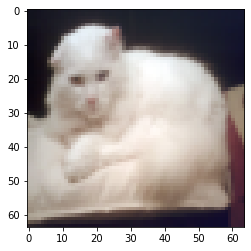

In [3]:
index = 13
plt.imshow(train_x_orig[index])
if train_y[0,index] == 1:
    print ("y = " + str(train_y[0,index]) + ". Es la imagen de un gato.")
else:
    print ("y = " + str(train_y[0,index]) + ". NO es la imagen de un gato.")

In [4]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


Normalmente lo que se hace cuando utilizamos un DNN totalmente conectada para este tipo de problemas, es transformar los datos de entrada en un vector unidimiensional y estandarizar los valores de cada pixel (dividiendolo entre 255 al ser RGB), en la imagen se ve claramente un ejemplo: 

<img src="images/imvectorkiank.png" style="width:450px;height:300px;">

<caption><center> <u>Figure 1</u>: Image to vector conversion. <br> </center></caption>

In [5]:
# Redimensionamos los conjuntos
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # El "-1" indica que se desea aplanar la curva! 
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Estandarizamos los valores de las features entre 0 y 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


$12,288$ = $64 \times 64 \times 3$ este es el tamañano de un vector transformado.

## 3 - Architecture of your model

Ahora que estamos un poco familiarizados con el dataset vamos a utilizar la red neuronal de L capaz implementada en el Pre-Workshop de Nacho para entrenar nuestro modelo y ver su resultado.

### 3.2 - L-layer deep neural network

Aqui mostramos una imagen que muestra la representacion de un DNN para este ejemplo:

<img src="images/LlayerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 3</u>: L-layer neural network. <br> The model can be summarized as: ***[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID***</center></caption>

<u>Detalles de la figura 3</u>:
- La entrada es un vector de (64,64,3) que representa una imagen aplanada en un vector de tamaño (12288,1).
- El correspondiente vector: $[x_0,x_1,...,x_{12287}]^T$ es multiplicado por la matriz de pesos $W^{[1]}$, mas el vector de bias $b^{[1]}$. Al resultado se le llama linear unit.
- Aplicamos la función `relu` a la linear unit. Este proceso se repite para todos los $(W^{[l]}, b^{[l]})$.
- Finalmente, aplicamos la función `sigmoid`. Si este valor es mayor a 0.5, clasificamos la imagen como un gato.


## 5 - L-layer Neural Network

Utilizamos la clase DeepNeuralNetwork implementada en un archivo .py para entrenar nuestro modelo.

In [6]:
### CONSTANTS ###
layers_dims_2_layer_network = [7] #  2-layer model

Costo en la iteración 0: 0.6950464961800915
Costo en la iteración 100: 0.5892596054583805
Costo en la iteración 200: 0.5232609173622991
Costo en la iteración 300: 0.4497686396221906
Costo en la iteración 400: 0.42090021618838996
Costo en la iteración 500: 0.37246403061745953
Costo en la iteración 600: 0.3474205187020189
Costo en la iteración 700: 0.31719191987370277
Costo en la iteración 800: 0.266437743477466
Costo en la iteración 900: 0.21991432807842576
Costo en la iteración 1000: 0.1435789889362377
Costo en la iteración 1100: 0.4530921262322144
Costo en la iteración 1200: 0.09499357670093511
Costo en la iteración 1300: 0.08014128076781371
Costo en la iteración 1400: 0.0694023400553646
Costo en la iteración 1500: 0.06021664023174591
Costo en la iteración 1600: 0.05327415758001876
Costo en la iteración 1700: 0.047629032620984335
Costo en la iteración 1800: 0.04297588879436867
Costo en la iteración 1900: 0.039036074365138215
Costo en la iteración 2000: 0.03568313638049026
Costo en la 

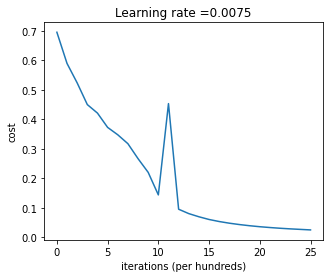

In [7]:
deep_neural_network_2_layer = DeepNeuralNetwork()
deep_neural_network_2_layer.fit(train_x, train_y, learning_rate = 0.0075, num_iterations = 2500, layer_hidden_neurons = layers_dims_2_layer_network,  activation = "relu")

In [ ]:
pred_train_2_layers = deep_neural_network_2_layer.predict(train_x, train_y, activation="relu")

In [10]:
pred_test_2_layers = deep_neural_network_2_layer.predict(test_x, test_y, activation="relu")

Accuracy: 0.74


Tamaño de conjunto de test: 50



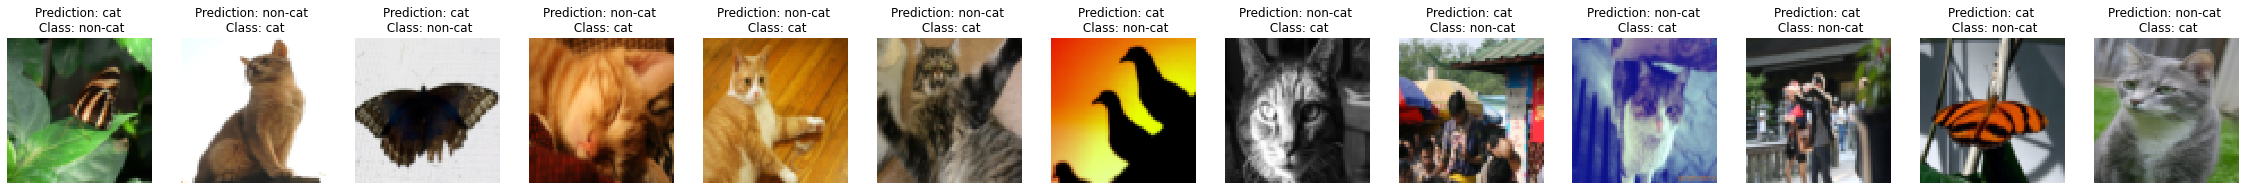

In [11]:
print(f"Tamaño de conjunto de test: {test_x.shape[1]}\n")
deep_neural_network_2_layer.print_mislabeled_images(classes, test_x, test_y, pred_test_2_layers)

In [12]:
### CONSTANTS ###
layers_dims = [20, 7, 5] #  4-layer model

Costo en la iteración 0: 0.7717493284237686
Costo en la iteración 100: 0.6720534400822914
Costo en la iteración 200: 0.6482632048575212
Costo en la iteración 300: 0.6115068816101354
Costo en la iteración 400: 0.5670473268366111
Costo en la iteración 500: 0.5401376634547801
Costo en la iteración 600: 0.5279299569455267
Costo en la iteración 700: 0.4654773771766851
Costo en la iteración 800: 0.36912585249592794
Costo en la iteración 900: 0.39174697434805344
Costo en la iteración 1000: 0.31518698886006163
Costo en la iteración 1100: 0.2726998441789385
Costo en la iteración 1200: 0.23741853400268137
Costo en la iteración 1300: 0.19960120532208647
Costo en la iteración 1400: 0.18926300388463305
Costo en la iteración 1500: 0.16118854665827748
Costo en la iteración 1600: 0.14821389662363316
Costo en la iteración 1700: 0.13777487812972944
Costo en la iteración 1800: 0.1297401754919012
Costo en la iteración 1900: 0.12122535068005212
Costo en la iteración 2000: 0.11382060668633712
Costo en la it

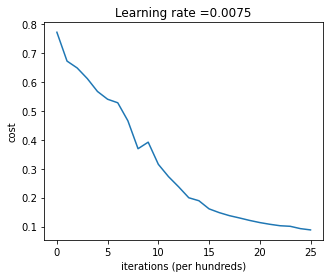

In [13]:
deep_neural_network = DeepNeuralNetwork()
deep_neural_network.fit(train_x, train_y, learning_rate = 0.0075, num_iterations = 2500, layer_hidden_neurons = layers_dims, activation="relu")

In [14]:
pred_train = deep_neural_network.predict(train_x, train_y, activation="relu")

Accuracy: 0.9856459330143539


<table>
    <tr>
    <td>
    **Train Accuracy**
    </td>
    <td>
    0.985645933014
    </td>
    </tr>
</table>

In [15]:
pred_test = deep_neural_network.predict(test_x, test_y, activation="relu")

Accuracy: 0.8


**Expected Output**:

<table> 
    <tr>
        <td> **Test Accuracy**</td>
        <td> 0.8 </td>
    </tr>
</table>

## Resultados

Tamaño de conjunto de test: 50



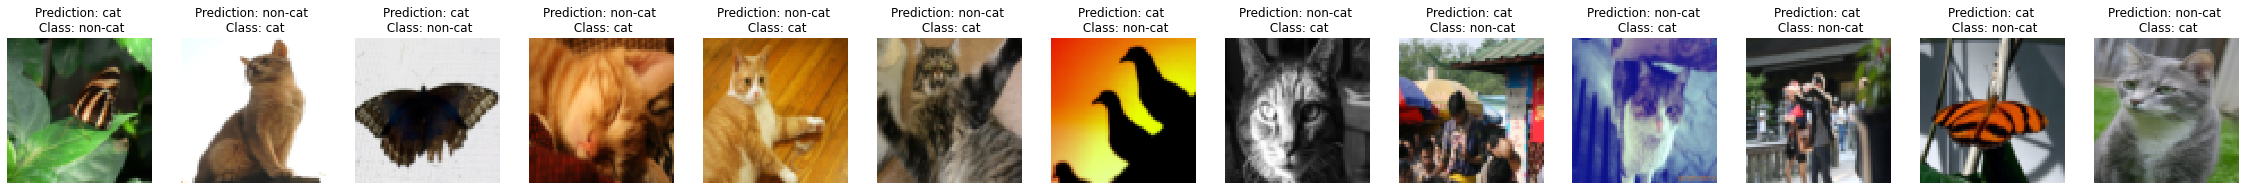

In [20]:
print(f"Tamaño de conjunto de test: {test_x.shape[1]}\n")
deep_neural_network_2_layer.print_mislabeled_images(classes, test_x, test_y, pred_test_2_layers)

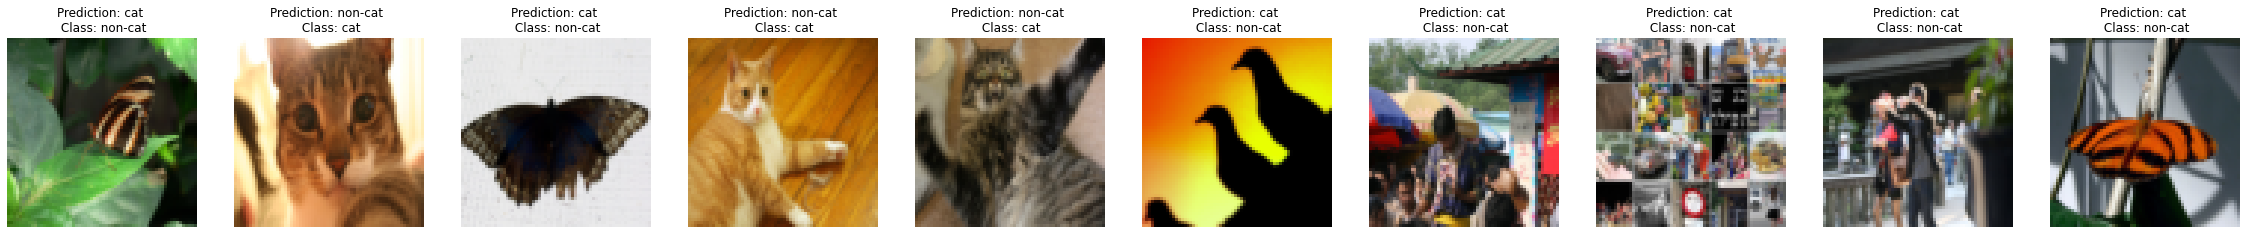

In [19]:
deep_neural_network.print_mislabeled_images(classes, test_x, test_y, pred_test)